# Brain Cancer Classification

## Importing Libraries

In [1]:
!pip install tensorflow

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

## Data

In [3]:
data = "data"
categories = os.listdir(data)
print("Categories found:", categories)

Categories found: ['brain_glioma', 'brain_menin', 'brain_tumor']


In [4]:
image_counts = {}
total_images = 0

for subclass in os.listdir(data):
    subclass_path = os.path.join(data, subclass)
    if os.path.isdir(subclass_path):
        num_images = len([
            f for f in os.listdir(subclass_path)
            if os.path.isfile(os.path.join(subclass_path, f))
        ])
        image_counts[subclass] = num_images
        total_images += num_images

print("Image counts in ALL subclasses:")
for subclass, count in image_counts.items():
    print(f"{subclass}: {count}")
print(f"\nTotal images in ALL: {total_images}")

Image counts in ALL subclasses:
brain_glioma: 5000
brain_menin: 5000
brain_tumor: 5000

Total images in ALL: 15000


In [5]:
X = []
y = []

img_size = 128  # You can increase to 150 or 224 later if your system can handle it

for label, category in enumerate(categories):
    folder_path = os.path.join(data, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


In [6]:
# Convert to NumPy arrays
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0

y = np.array(y)
y = to_categorical(y, num_classes=len(categories))

# Feedback and confirmation
print("✅ Data preprocessing complete!")
print(f"Shape of X: {X.shape}")  # e.g., (15000, 128, 128, 1)
print(f"Shape of y: {y.shape}")  # e.g., (15000, 3)

✅ Data preprocessing complete!
Shape of X: (15000, 128, 128, 1)
Shape of y: (15000, 3)


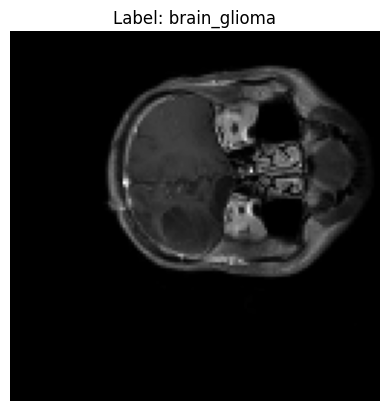

In [7]:
# Preview an example image and its label
index = 0
plt.imshow(X[index].reshape(img_size, img_size), cmap='gray')
plt.title(f"Label: {categories[np.argmax(y[index])]}")
plt.axis('off')
plt.show()

## Splitting

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split complete!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

✅ Data split complete!
Training samples: 12000
Testing samples: 3000


## Model Training

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\revna\Desktop\Colab Projects\Cancer_Classification\can_venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,131 (28.20 MB)

 Trainable params: 7,392,131 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 140ms/step - accuracy: 0.6706 - loss: 0.7255 - val_accuracy: 0.7980 - val_loss: 0.4936
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 134ms/step - accuracy: 0.7906 - loss: 0.5114 - val_accuracy: 0.8440 - val_loss: 0.4188
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 155ms/step - accuracy: 0.8381 - loss: 0.3945 - val_accuracy: 0.8683 - val_loss: 0.3312
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 156ms/step - accuracy: 0.8783 - loss: 0.3149 - val_accuracy: 0.8540 - val_loss: 0.3539
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 61s 162ms/step - accuracy: 0.9073 - loss: 0.2410 - val_accuracy: 0.8783 - val_loss: 0.3182
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 153ms/step - accuracy: 0.9268 - loss: 0.1882 - val_accuracy: 0.8870 - val_loss: 0.2990
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 146ms/step - accuracy: 0.9410 - loss: 0.1524 - val_accuracy: 0.8753 - val_loss: 0.3231
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - accuracy: 0.9543 - loss: 0

## Model Evaluation

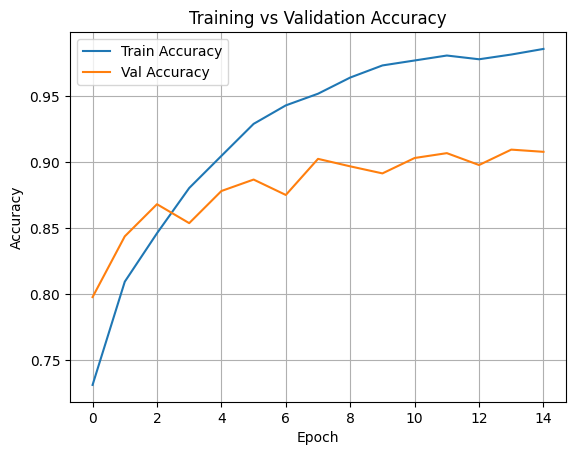

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import numpy as np

# Get predicted probabilities and class labels
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


In [14]:
print("📊 Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=categories))
print("✅ Accuracy Score:", accuracy_score(y_true, y_pred_classes))
try:
    auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
    print(f"ROC-AUC Score: {auc:.4f}")
except Exception as e:
    print("Could not compute AUC:", e)

📊 Classification Report:
              precision    recall  f1-score   support

brain_glioma       0.97      0.90      0.94      1000
 brain_menin       0.86      0.89      0.88      1000
 brain_tumor       0.90      0.94      0.92      1000

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000

✅ Accuracy Score: 0.908
ROC-AUC Score: 0.9828
